In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('/emails.csv')

In [10]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [12]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [13]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [15]:
X=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [20]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

svm=SVC(kernel='rbf',random_state=42)
svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

In [21]:
knn_pred=knn.predict(X_test_scaled)
svm_pred=svm.predict(X_test_scaled)

In [30]:
# Calculate metrics for KNN
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
knn_classification_report = classification_report(y_test, knn_pred)


In [31]:
# Calculate metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)
svm_classification_report = classification_report(y_test, svm_pred)

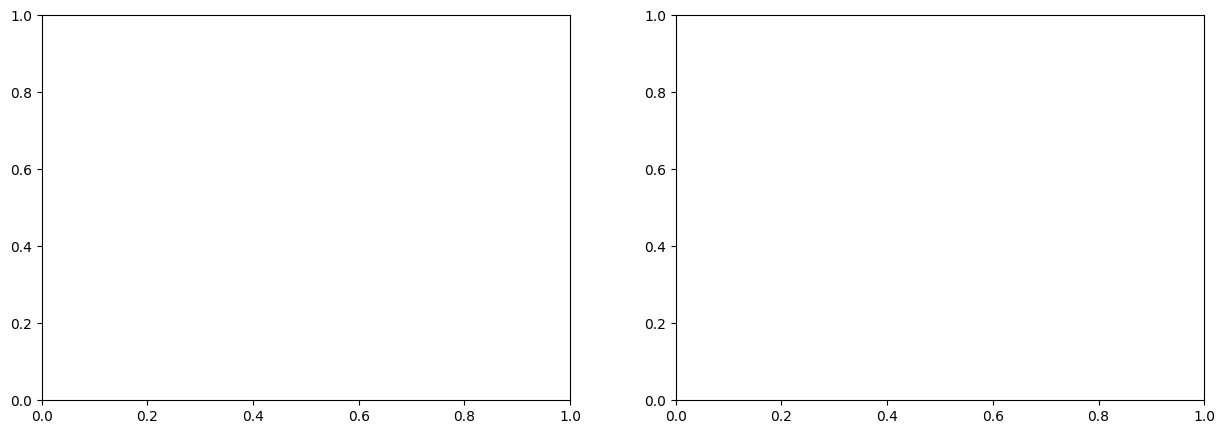

In [32]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

In [33]:
sns.heatmap(knn_confusion_matrix,annot=True,fmt='d',ax=ax1)
ax1.set_title('KNN Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

Text(158.22222222222223, 0.5, 'Actual')

In [34]:
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', ax=ax2)
ax2.set_title('SVM Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')


<Figure size 640x480 with 0 Axes>

In [35]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [29]:
import matplotlib
import seaborn as sns

print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)


Matplotlib version: 3.8.0
Seaborn version: 0.13.2


Loading dataset...
Training models...
Evaluating models...


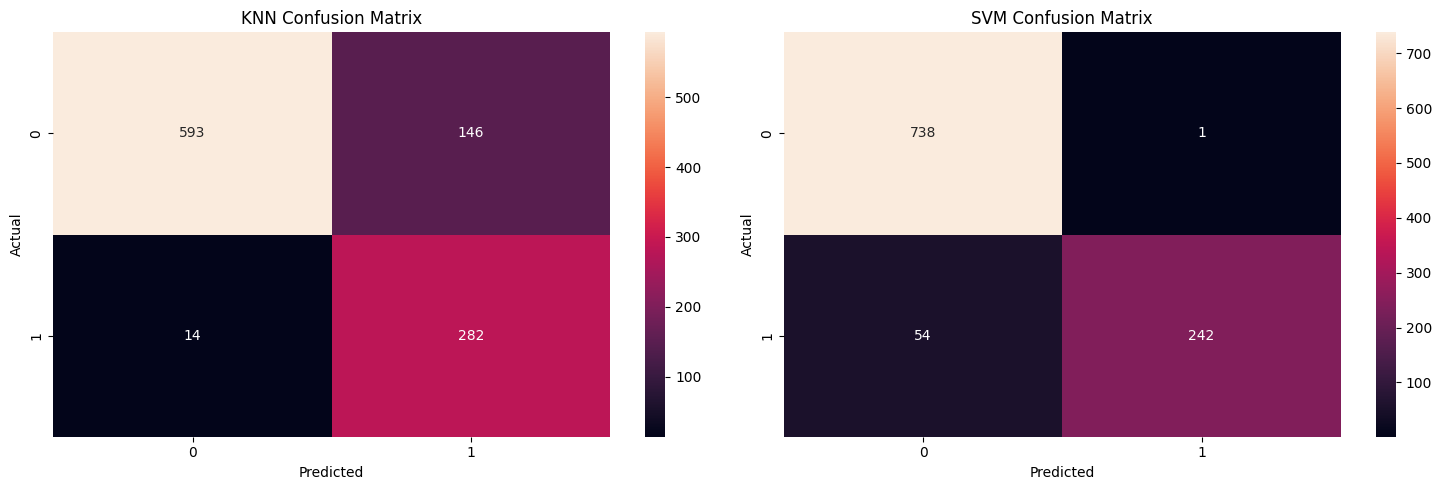

Model Performance Comparison:

KNN Classifier:
Accuracy: 0.8454

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       739
           1       0.66      0.95      0.78       296

    accuracy                           0.85      1035
   macro avg       0.82      0.88      0.83      1035
weighted avg       0.89      0.85      0.85      1035


SVM Classifier:
Accuracy: 0.9469

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       739
           1       1.00      0.82      0.90       296

    accuracy                           0.95      1035
   macro avg       0.96      0.91      0.93      1035
weighted avg       0.95      0.95      0.95      1035



In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the following line if you're using Jupyter Notebook
# %matplotlib inline

# Load the dataset
print("Loading dataset...")
df = pd.read_csv('/emails.csv')  # Replace with your dataset path

# Preprocess the dataset
# Separate features and target
X = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN and SVM models
print("Training models...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)

# Evaluate both models
print("Evaluating models...")
knn_pred = knn.predict(X_test_scaled)
svm_pred = svm.predict(X_test_scaled)

# Calculate metrics for KNN
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
knn_classification_report = classification_report(y_test, knn_pred)

# Calculate metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)
svm_classification_report = classification_report(y_test, svm_pred)

# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot KNN confusion matrix
sns.heatmap(knn_confusion_matrix, annot=True, fmt='d', ax=ax1)
ax1.set_title('KNN Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Plot SVM confusion matrix
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', ax=ax2)
ax2.set_title('SVM Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print detailed comparison of model performances
print("Model Performance Comparison:")
print("\nKNN Classifier:")
print(f"Accuracy: {knn_accuracy:.4f}")
print("\nClassification Report:")
print(knn_classification_report)

print("\nSVM Classifier:")
print(f"Accuracy: {svm_accuracy:.4f}")
print("\nClassification Report:")
print(svm_classification_report)
